<center><h1>TP2 RCR2:</h1></center>
<center><h2>Controlleur flou</h2></center>

## 0) Importation des librairies nécessaire

In [83]:
from fuzzylogic.classes import Domain, Set, Rule
from fuzzylogic.functions import trapezoid, triangular
import matplotlib.pyplot as plt
import numpy as np

## 1) Définition des E/S du controlleur

In [84]:
# initialisation de notre premier controleur d'entrée
Resolution = Domain('Resolution', 0, 100)

# initialisation de notre deuxieme controleur d'entrée
Luminosite = Domain('Luminosite', 9, 70)

# initialisation de notre troisième controleur d'entrée
QualiteImage = Domain('QualiteImage', 5, 50)

#Sortie
ContrasteImage = Domain('ContrasteImage', -80, 70)


## 2) Fuzification

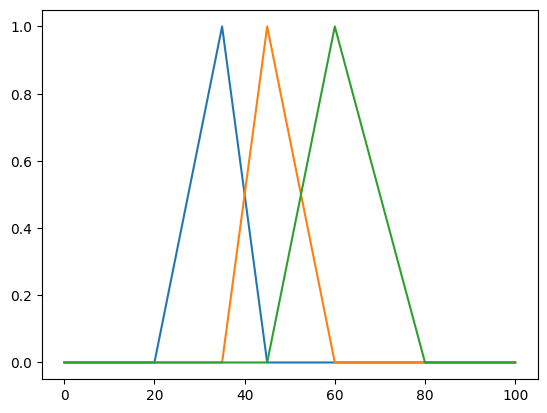

In [85]:
# Initisation des paramètres d'entrée de Resolution
Resolution.AV = trapezoid(20, 35, 35, 45)
Resolution.AC = trapezoid(35, 45, 45, 60)
Resolution.IN = trapezoid(45, 60, 60, 80)
Resolution.AV.plot()
Resolution.AC.plot()
Resolution.IN.plot()

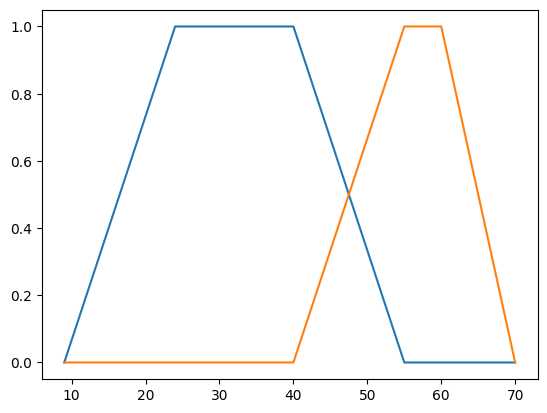

In [86]:
# Initisation des paramètres d'entrée de Luminosite
Luminosite.DN = trapezoid(9, 24, 40, 55)
Luminosite.HN = trapezoid(40, 55, 60, 70)
Luminosite.DN.plot()
Luminosite.HN.plot()

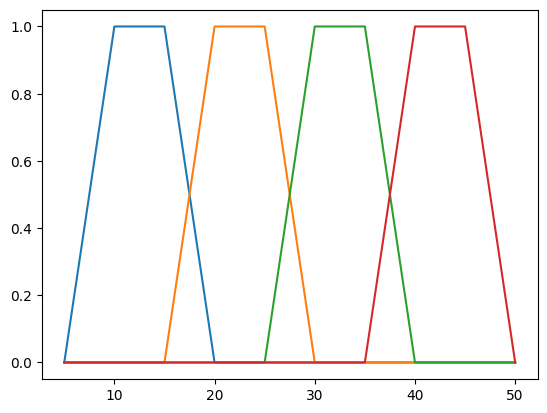

In [87]:
# Initisation des paramètres d'entrée de PI
QualiteImage.TG = trapezoid(5, 10, 15, 20)
QualiteImage.GR = trapezoid(15, 20, 25, 30)
QualiteImage.MO = trapezoid(25, 30, 35, 40)
QualiteImage.FA = trapezoid(35, 40, 45, 50)
QualiteImage.TG.plot()
QualiteImage.GR.plot()
QualiteImage.MO.plot()
QualiteImage.FA.plot()

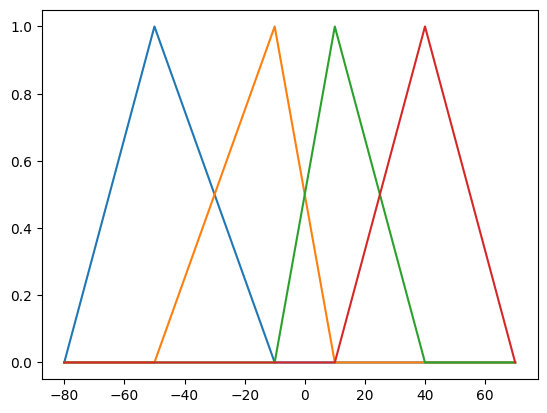

In [88]:
# Initisation des paramètres de sortie de ContrasteImage 
ContrasteImage.TF = trapezoid(-80, -50, -50, -10)
ContrasteImage.FO = trapezoid(-50, -10, -10, 10)
ContrasteImage.MO = trapezoid(-10, 10, 10, 40)
ContrasteImage.FA = trapezoid(10, 40, 40, 70)
ContrasteImage.TF.plot()
ContrasteImage.FO.plot()
ContrasteImage.MO.plot()
ContrasteImage.FA.plot()

## 3) Construction de la base de regle

In [89]:
# initialisation des regles de notre systeme
rules = Rule({
    (Resolution.AV, Luminosite.DN, QualiteImage.TG): ContrasteImage.FA,# R1
    (Resolution.AV, Luminosite.DN, QualiteImage.GR): ContrasteImage.MO,# R2
    (Resolution.AV, Luminosite.DN, QualiteImage.MO): ContrasteImage.FO,# R3
    (Resolution.AV, Luminosite.DN, QualiteImage.FA): ContrasteImage.TF,# R4
    (Resolution.AV, Luminosite.HN, QualiteImage.TG): ContrasteImage.FA,# R5
    (Resolution.AV, Luminosite.HN, QualiteImage.GR): ContrasteImage.MO,# R6
    (Resolution.AV, Luminosite.HN, QualiteImage.MO): ContrasteImage.FO,# R7
    (Resolution.AV, Luminosite.HN, QualiteImage.FA): ContrasteImage.TF,# R8
    (Resolution.AC, Luminosite.DN, QualiteImage.TG): ContrasteImage.FA,# R9
    (Resolution.AC, Luminosite.DN, QualiteImage.GR): ContrasteImage.MO,# R10
    (Resolution.AC, Luminosite.DN, QualiteImage.MO): ContrasteImage.FO,# R11
    (Resolution.AC, Luminosite.DN, QualiteImage.FA): ContrasteImage.TF,# R12
    (Resolution.AC, Luminosite.HN, QualiteImage.TG): ContrasteImage.FA,# R13
    (Resolution.AC, Luminosite.HN, QualiteImage.GR): ContrasteImage.MO,# R14
    (Resolution.AC, Luminosite.HN, QualiteImage.MO): ContrasteImage.FO,# R15
    (Resolution.AC, Luminosite.HN, QualiteImage.FA): ContrasteImage.TF,# R16
    (Resolution.IN, Luminosite.DN, QualiteImage.TG): ContrasteImage.FA,# R17
    (Resolution.IN, Luminosite.DN, QualiteImage.GR): ContrasteImage.MO,# R18
    (Resolution.IN, Luminosite.DN, QualiteImage.MO): ContrasteImage.FO,# R19
    (Resolution.IN, Luminosite.DN, QualiteImage.FA): ContrasteImage.TF,# R20
    (Resolution.IN, Luminosite.HN, QualiteImage.TG): ContrasteImage.FA,# R21
    (Resolution.IN, Luminosite.HN, QualiteImage.GR): ContrasteImage.MO,# R22
    (Resolution.IN, Luminosite.HN, QualiteImage.MO): ContrasteImage.FO,# R23
    (Resolution.IN, Luminosite.HN, QualiteImage.FA): ContrasteImage.TF # R24
})

## 4) Application de la méthode d'inférence (Mandani)

In [90]:
# On récupère les pourcentages d'appartenances de nos controleurs d'entrée selon leur valeur
tc_output = list(Resolution(52).values())
tc_output = [float(x) for x in tc_output]

nc_output = list(Luminosite(42).values())
nc_output = [float(x) for x in nc_output]

pi_output = list(QualiteImage(17).values())
pi_output = [float(x) for x in pi_output]

# On applique les régles d'inférence de mandanie
rc_tf = max(
                min(tc_output[2], nc_output[1], pi_output[2]), 
                min(tc_output[0], nc_output[1], pi_output[3]), 
                min(tc_output[2], nc_output[1], pi_output[3]), 
                min(tc_output[1], nc_output[1], pi_output[3])
                )

rc_fo = max(
                min(tc_output[0], nc_output[0], pi_output[2]), 
                min(tc_output[1], nc_output[0], pi_output[2]), 
                min(tc_output[2], nc_output[0], pi_output[2]), 
                min(tc_output[1], nc_output[1], pi_output[1]), 
                min(tc_output[2], nc_output[1], pi_output[1]),
                min(tc_output[1], nc_output[1], pi_output[2]), 
                min(tc_output[0], nc_output[1], pi_output[2])
                )

rc_mo = max(
                min(tc_output[0], nc_output[1], pi_output[0]), 
                min(tc_output[1], nc_output[1], pi_output[0]), 
                min(tc_output[2], nc_output[1], pi_output[0]), 
                min(tc_output[0], nc_output[1], pi_output[1]), 
                min(tc_output[1], nc_output[0], pi_output[1]), 
                min(tc_output[2], nc_output[0], pi_output[1]), 
                min(tc_output[0], nc_output[0], pi_output[2]), 
                min(tc_output[1], nc_output[0], pi_output[2]),
                min(tc_output[2], nc_output[0], pi_output[2])
                )

rc_fa = max(
                min(tc_output[0], nc_output[0], pi_output[0]), 
                min(tc_output[1], nc_output[0], pi_output[0]), 
                min(tc_output[2], nc_output[0], pi_output[0]),  
                min(tc_output[0], nc_output[0], pi_output[1])
                )


all_values = [rc_tf, rc_fo,  rc_mo, rc_fa]

print(f"ContrasteImage tres fort {rc_tf}\nContrasteImage {rc_fo}\nContrasteImage moyen {rc_mo}\nContrasteImage faible {rc_fa}")

ContrasteImage tres fort 0.0
ContrasteImage 0.13333333333333333
ContrasteImage moyen 0.4
ContrasteImage faible 0.5333333333333333


## 5) Défuzzification (Calcule du centre de gravité)

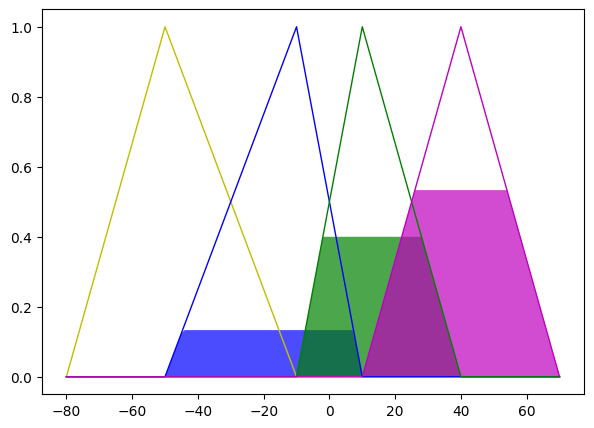

In [91]:
fig, axis = plt.subplots(figsize=(7, 5))

x_RC = ContrasteImage.range

RC_0 = np.zeros_like(x_RC)
parametres_RC = [ContrasteImage.TF, ContrasteImage.FO, ContrasteImage.MO, ContrasteImage.FA]
j=0
colors = ['y', 'b', 'g', 'm']
for each in parametres_RC:
    axis.plot(x_RC, each.array(), colors[j], linewidth=1)
    axis.fill_between(x_RC, RC_0, [min(all_values[j], x) for x in each.array()], facecolor=colors[j], alpha=0.7)
    j+=1

In [92]:
values = {Resolution: 52, Luminosite: 42, QualiteImage: 17}
centre_de_gravite = rules(values)
print(f"Centre de gravite obtenu avec les valeurs Resolution = 52, Luminisite = 42  et QualiteImage = 17 est egale a : {centre_de_gravite}")

Centre de gravite obtenu avec les valeurs Resolution = 52, Luminisite = 42  et QualiteImage = 17 est egale a : 27.095553453169373
